In [1]:
# ================================
# Linear Regression via LA Tools
# Defence Logistics Example
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# Defence Logistics Regression Demo

We will demonstrate **linear regression** using the bare minimum **linear algebra (LA) tools**.  
Dataset:  
- `Supply_Demand_Index` (independent variable, X)  
- `Logistics_Cost` (dependent variable, y)  

We create synthetic data with ~80% correlation.  

We will solve regression in **two ways**:  
1. Closed-form solution using **Normal Equation** (requires transpose, multiplication, inverse).  
2. Iterative solution using **Gradient Descent** (requires transpose, multiplication, subtraction, scalar operations).  

In [2]:
# ================================
# Generate synthetic dataset
# ================================

n = 50
supply_demand = np.linspace(10, 100, n)  # independent variable
# Add noise to create ~80% correlation
logistics_cost = 5 * supply_demand + np.random.normal(0, 80, n)

# Put into a DataFrame
df = pd.DataFrame({
    "Supply_Demand_Index": supply_demand,
    "Logistics_Cost": logistics_cost
})

# Quick look
df.head()

,Supply_Demand_Index,Logistics_Cost
0,10.000000,89.737132
1,11.836735,48.122529
2,13.673469,120.182430
3,15.510204,199.393409
4,17.346939,68.002424


### Visualizing the Dataset
Scatter plot to see the relationship between `Supply_Demand_Index` and `Logistics_Cost`.  
We expect a positive linear trend with noise.  

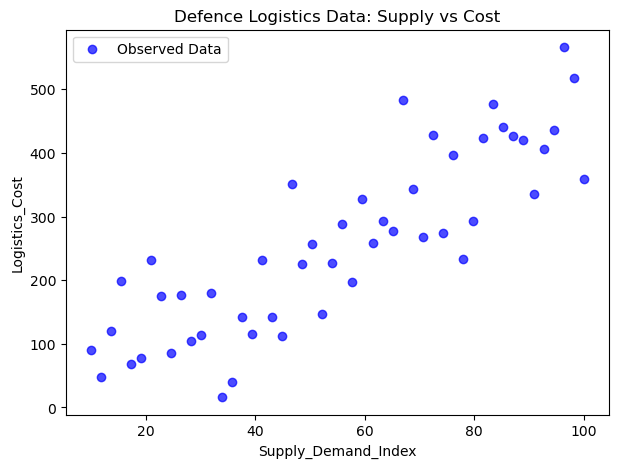

In [3]:
# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df["Supply_Demand_Index"], df["Logistics_Cost"], color="blue", alpha=0.7, label="Observed Data")
plt.xlabel("Supply_Demand_Index")
plt.ylabel("Logistics_Cost")
plt.title("Defence Logistics Data: Supply vs Cost")
plt.legend()
plt.show()

# 1. Closed-form Solution (Normal Equation)

We use the **Normal Equation**:  
$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

**LA Tools used:**  
- **Matrix multiplication**: to compute $ X^T X $ and $ X^T y $.  
- **Transpose**: to obtain $ X^T $.  
- **Inverse**: to compute $ (X^T X)^{-1} $.  

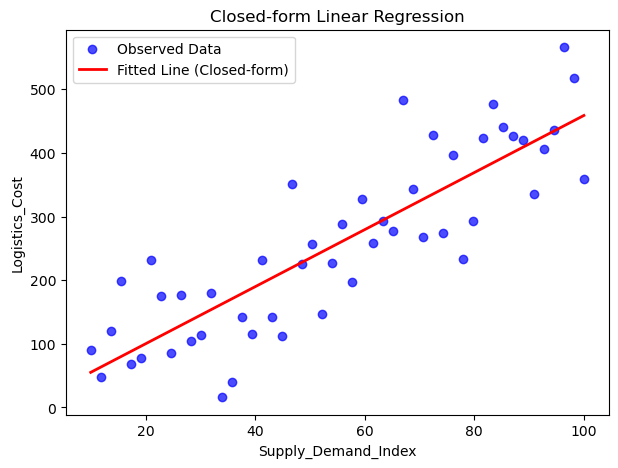

(10.30952733106642, 4.484592004517129)

In [4]:
# ================================
# Closed-form regression
# ================================

# Add intercept (column of 1s)
X = np.c_[np.ones(n), supply_demand]   # shape (n,2)
y = logistics_cost.reshape(-1, 1)      # column vector

# Apply Normal Equation
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Extract intercept and slope
intercept, slope = beta.flatten()

# Predictions
y_pred_closed = X @ beta

# Plot
plt.figure(figsize=(7,5))
plt.scatter(supply_demand, logistics_cost, color="blue", alpha=0.7, label="Observed Data")
plt.plot(supply_demand, y_pred_closed, color="red", linewidth=2, label="Fitted Line (Closed-form)")
plt.xlabel("Supply_Demand_Index")
plt.ylabel("Logistics_Cost")
plt.title("Closed-form Linear Regression")
plt.legend()
plt.show()

(intercept, slope)

# 2. Gradient Descent Solution

We iteratively update coefficients:  
$$
\beta \leftarrow \beta - \alpha \frac{1}{n} X^T (X\beta - y)
$$

**LA Tools used:**  
- **Matrix multiplication**: to compute $ X\beta $ and gradient.  
- **Transpose**: for $ X^T $.  
- **Vector subtraction**: to form residuals $ X\beta - y $.  
- **Scalar-vector multiplication**: to scale by learning rate $ \alpha $.  

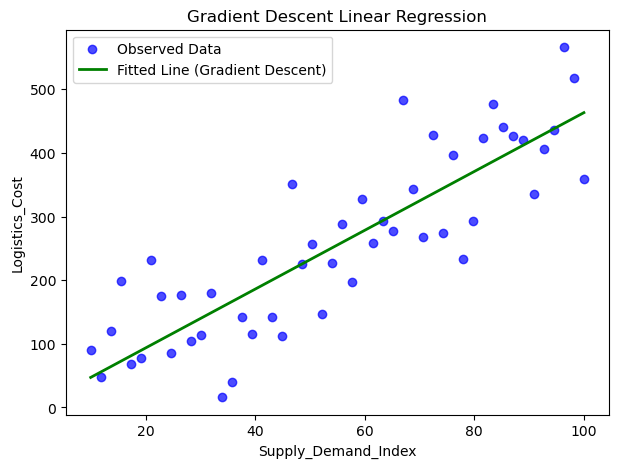

(0.989273685513837, 4.622119261028779)

In [5]:
# ================================
# Gradient Descent regression
# ================================

# Initialize coefficients
beta_gd = np.zeros((2,1))  

# Hyperparameters
alpha = 0.0005   # learning rate
epochs = 1000
losses = []

# Gradient Descent loop
for i in range(epochs):
    residuals = X @ beta_gd - y   # (n,1)
    gradient = (X.T @ residuals) / n
    beta_gd -= alpha * gradient   # update
    loss = np.mean(residuals**2) # MSE
    losses.append(loss)

# Extract coefficients
intercept_gd, slope_gd = beta_gd.flatten()

# Predictions
y_pred_gd = X @ beta_gd

# Plot fit
plt.figure(figsize=(7,5))
plt.scatter(supply_demand, logistics_cost, color="blue", alpha=0.7, label="Observed Data")
plt.plot(supply_demand, y_pred_gd, color="green", linewidth=2, label="Fitted Line (Gradient Descent)")
plt.xlabel("Supply_Demand_Index")
plt.ylabel("Logistics_Cost")
plt.title("Gradient Descent Linear Regression")
plt.legend()
plt.show()

(intercept_gd, slope_gd)

### Convergence Plot
The gradient descent solution converges by reducing the **Mean Squared Error (MSE)** over iterations.  

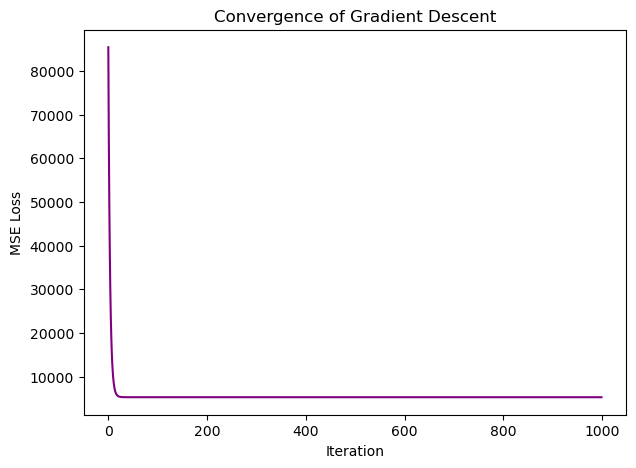

In [6]:
# Plot convergence
plt.figure(figsize=(7,5))
plt.plot(range(epochs), losses, color="purple")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Convergence of Gradient Descent")
plt.show()

# Summary

- **Closed-form (Normal Equation)** directly computes coefficients using inverse, transpose, and multiplication.  
- **Gradient Descent** iteratively converges using multiplication, transpose, subtraction, and scalar operations.  

Both give nearly the same fitted line on this synthetic **Defence Logistics dataset**.  

## Extra

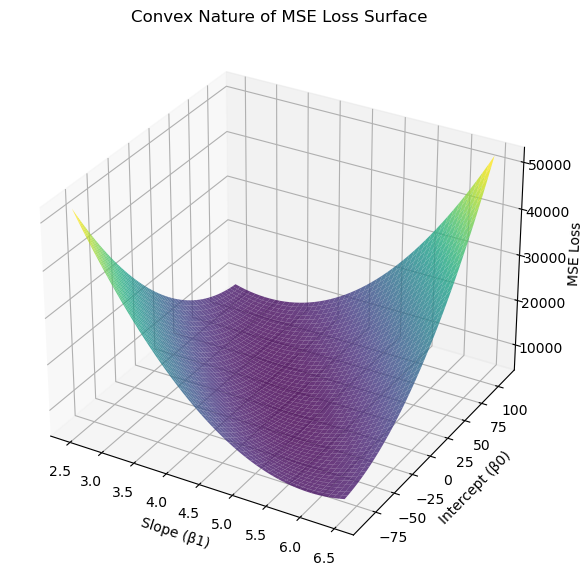

In [7]:
# ================================
# Convexity of MSE Loss Surface
# ================================

# Define a grid of possible slope and intercept values
intercepts = np.linspace(intercept-100, intercept+100, 50)
slopes = np.linspace(slope-2, slope+2, 50)

loss_grid = np.zeros((len(intercepts), len(slopes)))

# Compute MSE for each (intercept, slope) pair
for i, b0 in enumerate(intercepts):
    for j, b1 in enumerate(slopes):
        y_hat = b0 + b1 * supply_demand
        residuals = logistics_cost - y_hat
        loss_grid[i, j] = np.mean(residuals**2)

# Plot 3D surface
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
B0, B1 = np.meshgrid(slopes, intercepts)
ax.plot_surface(B0, B1, loss_grid, cmap="viridis", alpha=0.8)

ax.set_xlabel("Slope (β1)")
ax.set_ylabel("Intercept (β0)")
ax.set_zlabel("MSE Loss")
ax.set_title("Convex Nature of MSE Loss Surface")
plt.show()


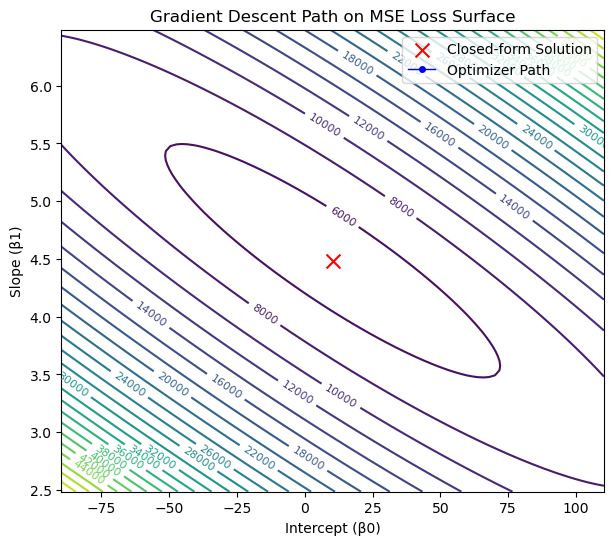

In [8]:
# ================================
# Animated Gradient Descent Path
# ================================
import matplotlib.animation as animation

# Build loss surface for contour plot
intercepts = np.linspace(intercept-100, intercept+100, 100)
slopes = np.linspace(slope-2, slope+2, 100)
B0, B1 = np.meshgrid(intercepts, slopes)
loss_grid = np.zeros_like(B0)

for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        y_hat = B0[i,j] + B1[i,j] * supply_demand
        residuals = logistics_cost - y_hat
        loss_grid[i,j] = np.mean(residuals**2)

# Re-run gradient descent but record parameter path
beta_path = []
beta_gd = np.zeros((2,1))
alpha = 0.0005
epochs = 100

for i in range(epochs):
    residuals = X @ beta_gd - y
    gradient = (X.T @ residuals) / n
    beta_gd -= alpha * gradient
    beta_path.append(beta_gd.flatten())

beta_path = np.array(beta_path)

# Create animated plot
fig, ax = plt.subplots(figsize=(7,6))
contours = ax.contour(B0, B1, loss_grid, levels=30, cmap="viridis")
ax.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel("Intercept (β0)")
ax.set_ylabel("Slope (β1)")
ax.set_title("Gradient Descent Path on MSE Loss Surface")

# Mark the true closed-form solution
ax.scatter(intercept, slope, color="red", marker="x", s=100, label="Closed-form Solution")
path_line, = ax.plot([], [], color="blue", marker="o", markersize=4, lw=1, label="Optimizer Path")
point, = ax.plot([], [], color="blue", marker=">", markersize=10)

# Text for displaying parameter values
param_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=10, color="darkred")

ax.legend()

def init():
    path_line.set_data([], [])
    point.set_data([], [])
    param_text.set_text('')
    return path_line, point, param_text

def update(frame):
    path_line.set_data(beta_path[:frame,0], beta_path[:frame,1])
    point.set_data(beta_path[frame,0], beta_path[frame,1])
    param_text.set_text(f"β0={beta_path[frame,0]:.2f}, β1={beta_path[frame,1]:.2f}")
    return path_line, point, param_text

ani = animation.FuncAnimation(fig, update, frames=len(beta_path),
                              init_func=init, blit=True, interval=150, repeat=False)

plt.show()


In [9]:
# ================================
# Save Animation
# ================================
save_path_mp4 = "gd_path_animation.mp4"
save_path_gif = "gd_path_animation.gif"

# Save as MP4 (requires ffmpeg installed)
ani.save(save_path_mp4, writer="ffmpeg", fps=5)

# Save as GIF (requires ImageMagick installed)
ani.save(save_path_gif, writer="imagemagick", fps=5)

print(f"Animation saved as {save_path_mp4} and {save_path_gif}")


/var/folders/w_/x0n194053mz1w332q7_975500000gn/T/ipykernel_86013/542997661.py:58: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(beta_path[frame,0], beta_path[frame,1])
MovieWriter imagemagick unavailable; using Pillow instead.
/var/folders/w_/x0n194053mz1w332q7_975500000gn/T/ipykernel_86013/542997661.py:58: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(beta_path[frame,0], beta_path[frame,1])


Animation saved as gd_path_animation.mp4 and gd_path_animation.gif


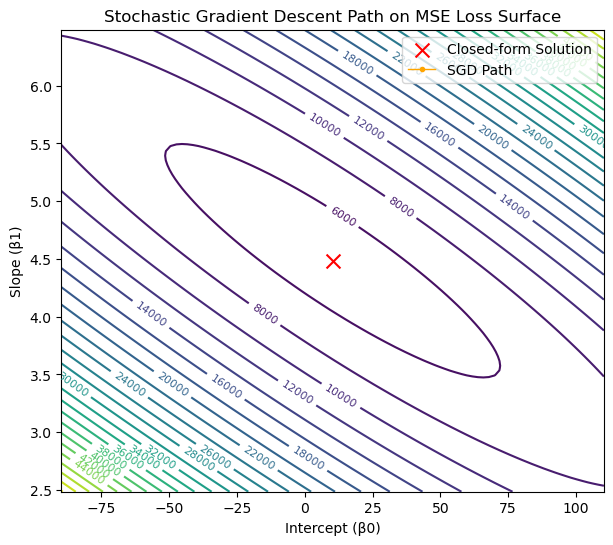

In [10]:
# ================================
# Stochastic Gradient Descent (SGD) Path
# ================================
import random

# Re-run SGD with path recording
beta_path_sgd = []
beta_sgd = np.zeros((2,1))
alpha = 0.0005
epochs = 10  # fewer epochs because updates are per-sample

for epoch in range(epochs):
    indices = np.arange(n)
    np.random.shuffle(indices)  # shuffle data each epoch
    for i in indices:
        xi = X[i, :].reshape(1, -1)   # single sample
        yi = y[i].reshape(-1, 1)
        residual = xi @ beta_sgd - yi
        gradient = xi.T @ residual    # (2,1)
        beta_sgd -= alpha * gradient
        beta_path_sgd.append(beta_sgd.flatten())

beta_path_sgd = np.array(beta_path_sgd)

# Animated contour plot for SGD
fig, ax = plt.subplots(figsize=(7,6))
contours = ax.contour(B0, B1, loss_grid, levels=30, cmap="viridis")
ax.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel("Intercept (β0)")
ax.set_ylabel("Slope (β1)")
ax.set_title("Stochastic Gradient Descent Path on MSE Loss Surface")

# Mark the true closed-form solution
ax.scatter(intercept, slope, color="red", marker="x", s=100, label="Closed-form Solution")
path_line, = ax.plot([], [], color="orange", marker="o", markersize=3, lw=1, label="SGD Path")
point, = ax.plot([], [], color="orange", marker=">", markersize=10)
param_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=10, color="darkred")

ax.legend()

def init():
    path_line.set_data([], [])
    point.set_data([], [])
    param_text.set_text('')
    return path_line, point, param_text

def update(frame):
    path_line.set_data(beta_path_sgd[:frame,0], beta_path_sgd[:frame,1])
    point.set_data(beta_path_sgd[frame,0], beta_path_sgd[frame,1])
    param_text.set_text(f"β0={beta_path_sgd[frame,0]:.2f}, β1={beta_path_sgd[frame,1]:.2f}")
    return path_line, point, param_text

ani_sgd = animation.FuncAnimation(fig, update, frames=len(beta_path_sgd),
                                  init_func=init, blit=True, interval=100, repeat=False)

plt.show()


In [11]:
# ================================
# Save SGD Animation
# ================================
save_path_mp4_sgd = "sgd_path_animation.mp4"
save_path_gif_sgd = "sgd_path_animation.gif"

# Save as MP4 (requires ffmpeg installed)
ani_sgd.save(save_path_mp4_sgd, writer="ffmpeg", fps=10)

# Save as GIF (requires ImageMagick installed)
ani_sgd.save(save_path_gif_sgd, writer="imagemagick", fps=10)

print(f"SGD animation saved as {save_path_mp4_sgd} and {save_path_gif_sgd}")


/var/folders/w_/x0n194053mz1w332q7_975500000gn/T/ipykernel_86013/2938911019.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(beta_path_sgd[frame,0], beta_path_sgd[frame,1])
MovieWriter imagemagick unavailable; using Pillow instead.
/var/folders/w_/x0n194053mz1w332q7_975500000gn/T/ipykernel_86013/2938911019.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(beta_path_sgd[frame,0], beta_path_sgd[frame,1])


SGD animation saved as sgd_path_animation.mp4 and sgd_path_animation.gif


# Derivation of the Closed-form Solution (Normal Equation)

We aim to find coefficients \( \beta \) that minimize the **Mean Squared Error (MSE)**:

$$
J(\beta) = \| y - X\beta \|^2 = (y - X\beta)^T (y - X\beta)
$$

---

### Step 1: Expand the quadratic form
$$
J(\beta) = y^T y - 2\beta^T X^T y + \beta^T X^T X \beta
$$

---

### Step 2: Take derivative w.r.t. \(\beta\)
$$
\frac{\partial J}{\partial \beta} = -2X^T y + 2X^T X \beta
$$

---

### Step 3: Set derivative to zero (First-order optimality condition)
$$
X^T X \beta = X^T y
$$

---

### Step 4: Solve for \(\beta\) (Normal Equation)
$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

---

✅ This shows that the **closed-form solution** comes directly from minimizing the squared error, requiring only **transpose, multiplication, and inverse** operations.
